# Аналіз даних про таксі в Нью-Йорку: пошук закономірностей за допомогою візуалізацій

>Кроки з 1 по 6 - опис даних, трансформація даних та "очищення" з метою підготовки до аналізу даних про таксі в Нью-Йорку (крок з 7 по 15)

0.Імпортуйте matplotlib.pyplot, seaborn та pandas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. 
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

In [2]:
# Спершу - завантажуємо дані - просто виконайте клітинку нижче
df_taxi = sns.load_dataset('taxis')

1.Виведемо: 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [3]:
df_taxi.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [4]:
df_taxi.dtypes

pickup              object
dropoff             object
passengers           int64
distance           float64
fare               float64
tip                float64
tolls              float64
total              float64
color               object
payment             object
pickup_zone         object
dropoff_zone        object
pickup_borough      object
dropoff_borough     object
dtype: object

In [5]:
df_taxi.shape

(6433, 14)

2.Перевіримо, чи є в цьому наборі даних пропущені значення:

In [6]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Виконаємо ряд команд та з'ясуємо це:

In [7]:
df_taxi.loc[df_taxi.dropoff_zone.isna()]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


In [8]:
df_taxi.loc[df_taxi[['dropoff_zone', 'dropoff_borough']].isna().any(axis=1)]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


In [9]:
df_taxi.loc[df_taxi[['payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough']].isna().any(axis=1)]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.4,8.5,0.00,0.0,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.0,100.38,yellow,credit card,NaN,NaN,NaN,NaN
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.3,5.5,0.00,0.0,6.30,yellow,NaN,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.6,2.5,0.00,0.0,5.80,yellow,NaN,Murray Hill,Murray Hill,Manhattan,Manhattan
545,2019-03-27 11:03:43,2019-03-27 11:14:34,1,4.2,15.0,0.00,0.0,15.80,yellow,NaN,LaGuardia Airport,Forest Hills,Queens,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,2019-03-30 00:49:48,2019-03-30 00:49:56,1,0.0,25.0,0.00,0.0,25.50,green,credit card,Prospect Heights,NaN,Brooklyn,NaN
6169,2019-03-27 02:11:01,2019-03-27 02:12:03,1,4.1,3.0,0.00,0.0,4.30,green,NaN,Jackson Heights,Jackson Heights,Queens,Queens
6311,2019-03-12 07:10:30,2019-03-12 07:14:18,1,0.7,4.5,0.00,0.0,5.30,green,NaN,Long Island City/Hunters Point,Long Island City/Hunters Point,Queens,Queens
6314,2019-03-28 22:36:04,2019-03-28 22:36:07,1,0.0,25.0,0.00,0.0,25.00,green,cash,Jamaica,NaN,Queens,NaN


Відповідь: Наприклад, у рядках із індексами 42 та 622 невідомі значення `pickup_zone, dropoff_zone, pickup_borough, та dropoff_borough.` Варто звернути увагу, що в обох випадках(кейсах) за поїздку було сплачено `total > 100 USD`, але час поїздки мав "приголомшливу" тривалість `([pickup - dropoff] < 1 хвилини)` та "дивну" протяжність маршруту `(distance == 0)`. Таким чином, можна зробити висновок, що таксі було викликано й оплачено онлайн кредитною карткою через онлайн-гаманець, але згодом замовлення було відмінено, проте гроші вже було знято, а тому таксі не проїхало "жодного" метру та й тривалість маршруту була мізерною. Цілком ймовірно, що клієнтам згодом повернуть гроші в термін визначений політикою компанії.   

In [10]:
df_taxi.passengers.value_counts()

1    4678
2     876
5     277
3     243
6     153
4     110
0      96
Name: passengers, dtype: int64

In [11]:
df_taxi.loc[df_taxi['passengers'].idxmin()]

pickup             2019-03-22 12:47:13
dropoff            2019-03-22 12:58:17
passengers                           0
distance                           1.4
fare                               8.5
tip                                0.0
tolls                              0.0
total                             11.8
color                           yellow
payment                            NaN
pickup_zone                Murray Hill
dropoff_zone                  Flatiron
pickup_borough               Manhattan
dropoff_borough              Manhattan
Name: 7, dtype: object

- Ще одна цікава ситуація, коли ми можемо спостерігати 96 випадків з к-тю пасажирів у таксі рівною нулю. 
Наприклад, коли ми вивели найменше значення серед `passengers`, то бачимо, що `distance` == 1.4, а `total` == 11.8 USD. Це можна пояснити тим, що таксі сервіс може надавати послугу доставки, тому й чайові становлять 0 USD, але є з чайовими - див. рисунок нижче.

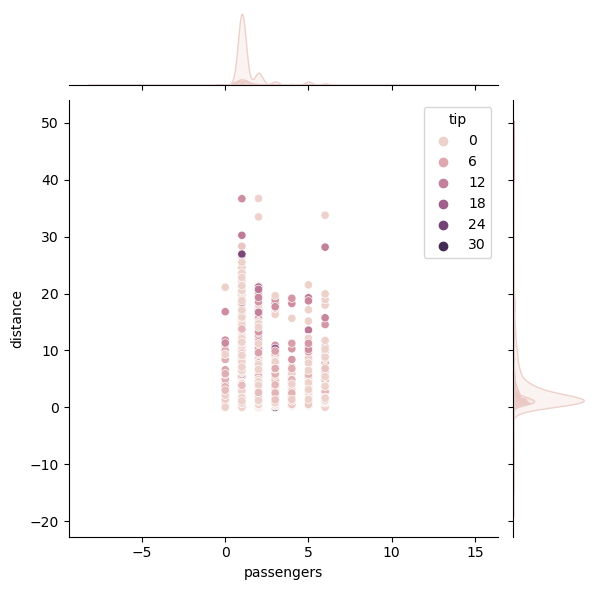

In [12]:
sns.jointplot(data=df_taxi, x="passengers", y="distance", hue="tip");

- Додаткова інформація:

In [13]:
df_taxi.payment.value_counts()

credit card    4577
cash           1812
Name: payment, dtype: int64

In [14]:
df_taxi.loc[df_taxi['total'].idxmin()]

pickup                        2019-03-08 02:21:32
dropoff                       2019-03-08 02:24:58
passengers                                      1
distance                                      3.1
fare                                          1.0
tip                                           0.0
tolls                                         0.0
total                                         1.3
color                                      yellow
payment                                      cash
pickup_zone        Long Island City/Hunters Point
dropoff_zone       Long Island City/Hunters Point
pickup_borough                             Queens
dropoff_borough                            Queens
Name: 1501, dtype: object

3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створімо набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

In [15]:
df_taxi.dropna(subset=['pickup_borough'])

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [16]:
df_taxi_clean = df_taxi.fillna('NA')

Перевіряємо чи в нас ще є пусті значення:

In [17]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

4.Давайте поглянемо на дані у динаміці. Перетворимо колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. Результат перетворення збережемо в тій самій колонці `pickup`.

In [18]:
import datetime as dt
df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'])

Перевіряємо чи відбулась зміна формату:

In [19]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

5.Колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконаємо таку команду:

In [20]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

А тепер згрупуємо дані по pickup_day та виведемо графік сумарних платежів по дням.

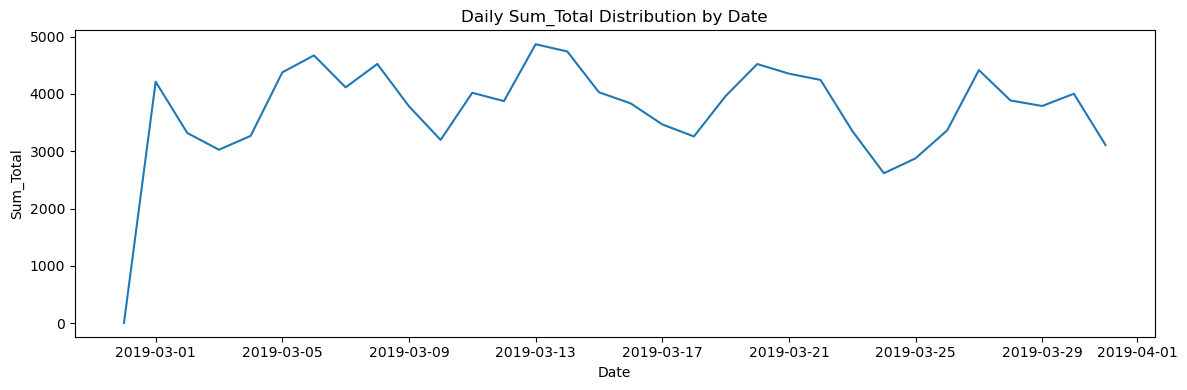

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(df_taxi_clean.groupby('pickup_day')['total'].sum())
plt.title("Daily Sum_Total Distribution by Date")
plt.xlabel("Date")
plt.ylabel("Sum_Total")
plt.tight_layout();

6.Порахуємо кількість рядків для кожного pickup_day.

In [22]:
df_taxi_clean['pickup_day'].value_counts()

2019-03-14    260
2019-03-06    257
2019-03-13    244
2019-03-01    241
2019-03-08    235
2019-03-20    233
2019-03-27    232
2019-03-22    229
2019-03-05    228
2019-03-21    221
2019-03-16    220
2019-03-12    218
2019-03-07    218
2019-03-30    215
2019-03-11    209
2019-03-29    209
2019-03-23    209
2019-03-28    205
2019-03-09    204
2019-03-15    201
2019-03-19    201
2019-03-02    198
2019-03-31    187
2019-03-10    185
2019-03-17    178
2019-03-26    178
2019-03-18    173
2019-03-04    171
2019-03-03    169
2019-03-25    155
2019-03-24    149
2019-02-28      1
Name: pickup_day, dtype: int64

Бачимо, що для дати 2019-02-28 є тільки один рядок. Це запис, який схоже, потрапив сюди випадково, видалимо з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову побудуємо графік сумарних платежів по pickup_day.

In [23]:
df_taxi_clean.loc[df_taxi_clean['pickup_day'].idxmax()]

pickup                   2019-03-31 15:43:37
dropoff                  2019-03-31 15:53:39
passengers                                 1
distance                                0.55
fare                                     7.5
tip                                      1.5
tolls                                    0.0
total                                   12.3
color                                 yellow
payment                          credit card
pickup_zone                     Clinton East
dropoff_zone       Times Sq/Theatre District
pickup_borough                     Manhattan
dropoff_borough                    Manhattan
pickup_day               2019-03-31 00:00:00
Name: 69, dtype: object

In [24]:
df_taxi_clean.loc[df_taxi_clean['pickup_day'].idxmin()]

pickup                       2019-02-28 23:29:03
dropoff                      2019-02-28 23:32:35
passengers                                     1
distance                                     0.9
fare                                         5.0
tip                                          0.0
tolls                                        0.0
total                                        6.3
color                                      green
payment                                     cash
pickup_zone                          Old Astoria
dropoff_zone       Long Island City/Queens Plaza
pickup_borough                            Queens
dropoff_borough                           Queens
pickup_day                   2019-02-28 00:00:00
Name: 6203, dtype: object

In [25]:
df_taxi_clean.drop(index = [df_taxi_clean['pickup_day'].idxmin()], inplace=True)

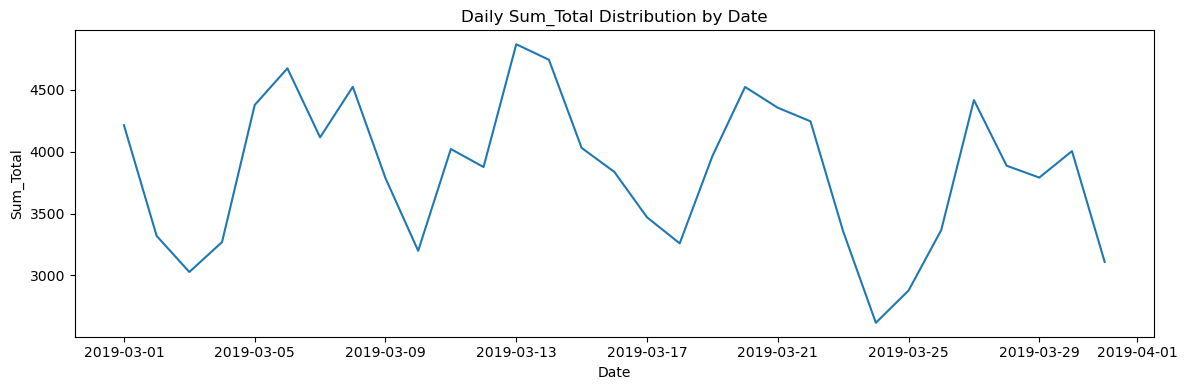

In [26]:
plt.figure(figsize=(12, 4))
plt.plot(df_taxi_clean.groupby('pickup_day')['total'].sum())
plt.title("Daily Sum_Total Distribution by Date")
plt.xlabel("Date")
plt.ylabel("Sum_Total")
plt.tight_layout();

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зведену таблицю, де рядками є pickup_day, колонками pickup_borough, а значенням - сума платежів. Запишимо зведену таблицю в змінну `borough_pivot`.

In [27]:
borough_pivot = df_taxi_clean.pivot_table(index='pickup_day', columns='pickup_borough', values='total',  aggfunc='sum')
borough_pivot = borough_pivot[['Bronx', 'Brooklyn', 'Manhattan', 'Queens']]
display(borough_pivot.style.background_gradient(axis=1))

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01 00:00:00,123.420000,353.050000,3169.470000,553.290000
2019-03-02 00:00:00,nan,146.560000,2716.330000,456.130000
2019-03-03 00:00:00,80.750000,407.060000,2100.230000,428.730000
2019-03-04 00:00:00,92.000000,188.730000,2026.170000,962.180000
2019-03-05 00:00:00,98.160000,558.400000,2981.260000,739.560000
2019-03-06 00:00:00,130.650000,198.530000,3501.070000,833.360000
2019-03-07 00:00:00,nan,440.750000,3087.820000,587.130000
2019-03-08 00:00:00,79.200000,237.470000,3408.850000,780.340000
2019-03-09 00:00:00,80.220000,187.880000,2967.710000,511.730000


Далі запустимо наступну клітинку та дамо відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   

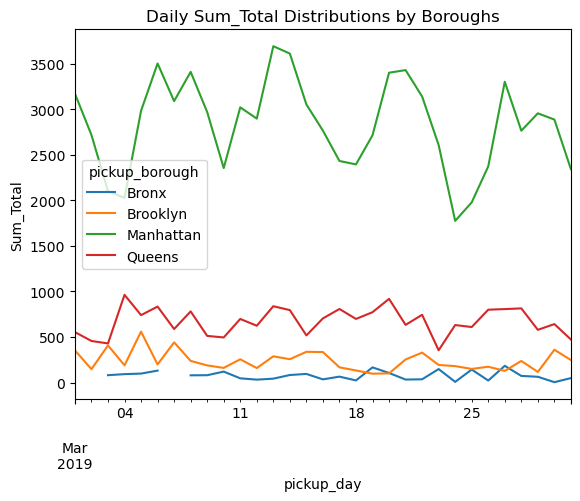

In [28]:
borough_pivot.plot()
plt.title("Daily Sum_Total Distributions by Boroughs")
plt.ylabel("Sum_Total");

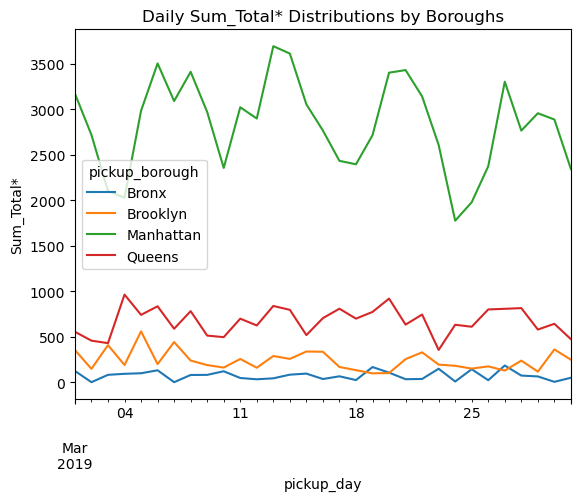

In [29]:
borough_pivot.fillna(0).plot()
plt.title("Daily Sum_Total* Distributions by Boroughs")
plt.ylabel("Sum_Total*");

- Район, в якому найчастіше спостерігається найбільша сума денних платежів за поїздки на таксі - `Manhattan`

8.Побудуємо гістограми суми денних платежів за поїздки по кожному з районів.

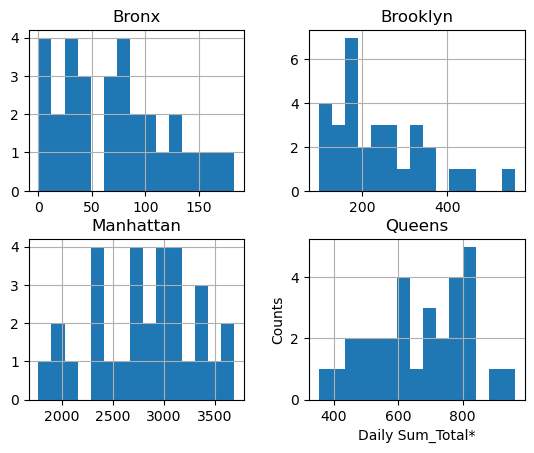

In [30]:
borough_pivot.fillna(0).hist(bins=15)
plt.xlabel('Daily Sum_Total*')
plt.ylabel('Counts');

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Спробуємо порівняти розподіли денних сум платежів по райнам.

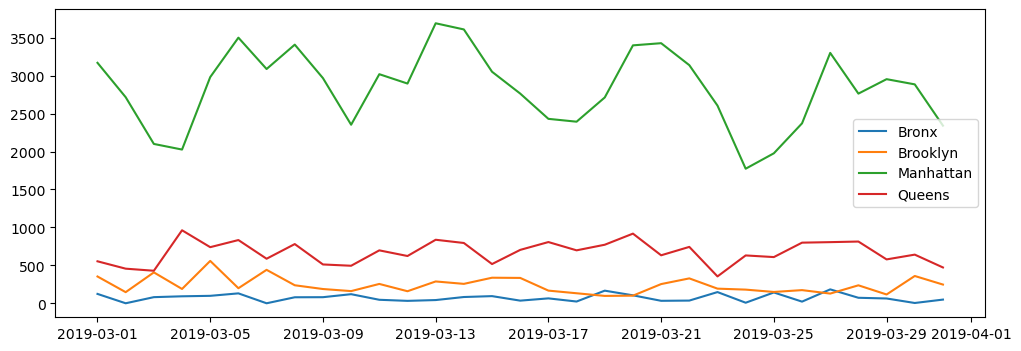

In [31]:
plt.figure(figsize=(12, 4))
plt.plot(borough_pivot.fillna(0))
plt.legend(borough_pivot);

<Figure size 640x480 with 0 Axes>

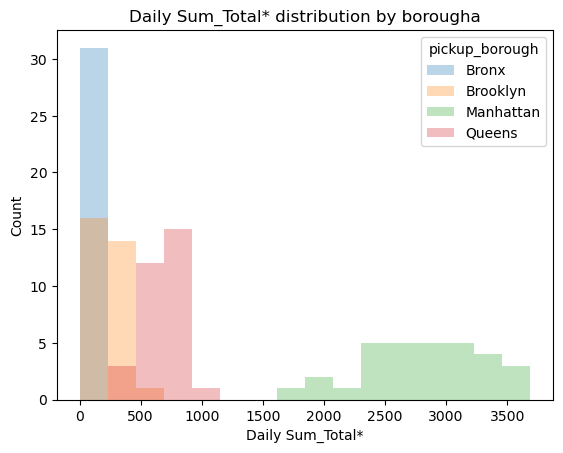

In [32]:
plt.figure()
borough_pivot.fillna(0).plot.hist(histtype='stepfilled', bins=16, alpha=0.3)
plt.xlabel('Daily Sum_Total*')
plt.ylabel('Count')
plt.title('Daily Sum_Total* distribution by borougha');

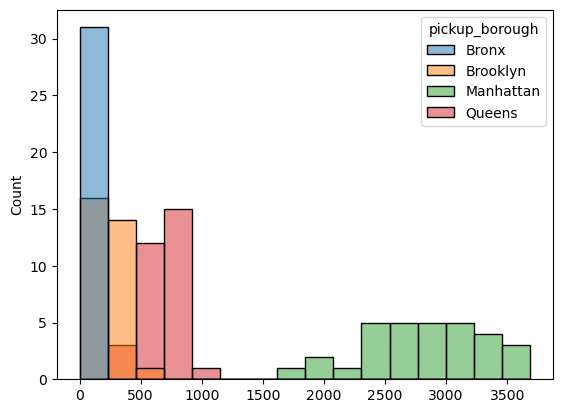

In [33]:
sns.histplot(data=borough_pivot.fillna(0), stat='count', bins=16);

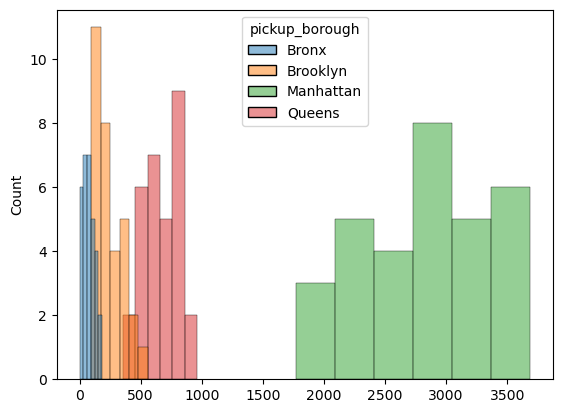

In [34]:
sns.histplot(data=borough_pivot.fillna(0), 
             stat='count', 
             bins=6, 
             cumulative=False, 
             common_bins=False,);

10.З допомогою seaborn виведемо гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі зобразимо кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановимо розмір фігури (10,5) та знайдемо значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).

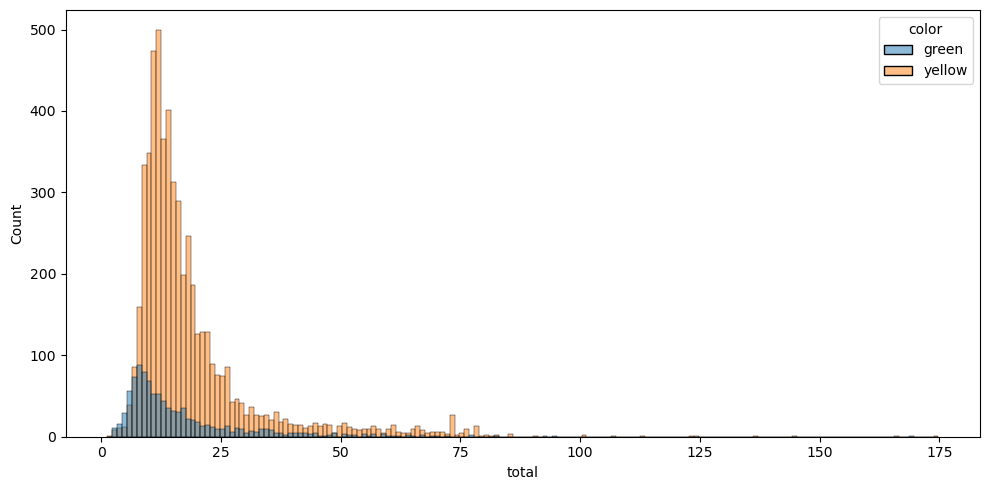

In [35]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(data=df_taxi_clean, x="total", hue="color", hue_order=('green', 'yellow'))
plt.tight_layout();

11.Перевіримо чи є залежність між дальністю поїздки і розміром чайових? Побудуємо діаграму розсіювання між дальністю поїздки і розміром чайових.

<Figure size 1200x400 with 0 Axes>

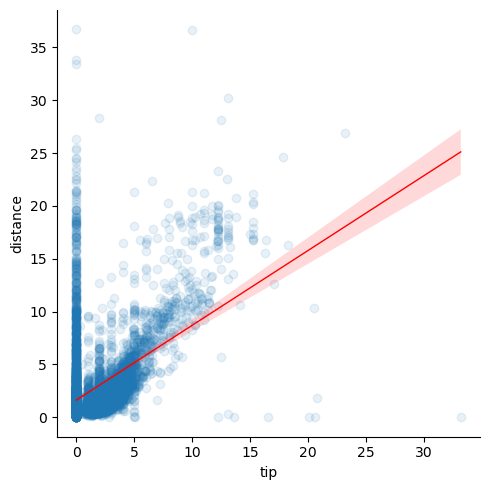

In [36]:
plt.figure(figsize=(12, 4))
sns.lmplot(data=df_taxi_clean, x="tip", y="distance", 
           line_kws={'color': 'red', 'lw': '1'},
          scatter_kws={'alpha': 0.1})
plt.tight_layout();

- Спостерігається пряма взаємозалежність між дальністю поїздки і розміром чайових.

13.Побудуємо поденну динаміку чайових по районам, в яких забрали пасажира.
Дамо відповіді на питання:
- при початку поїздки в якому районі **найрідше** дають чайові?
- а в поїздках з якого району **найчастіше** дають чайові? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

In [37]:
df_taxi_new_clean = df_taxi_clean[df_taxi_clean.pickup_borough != 'NA']

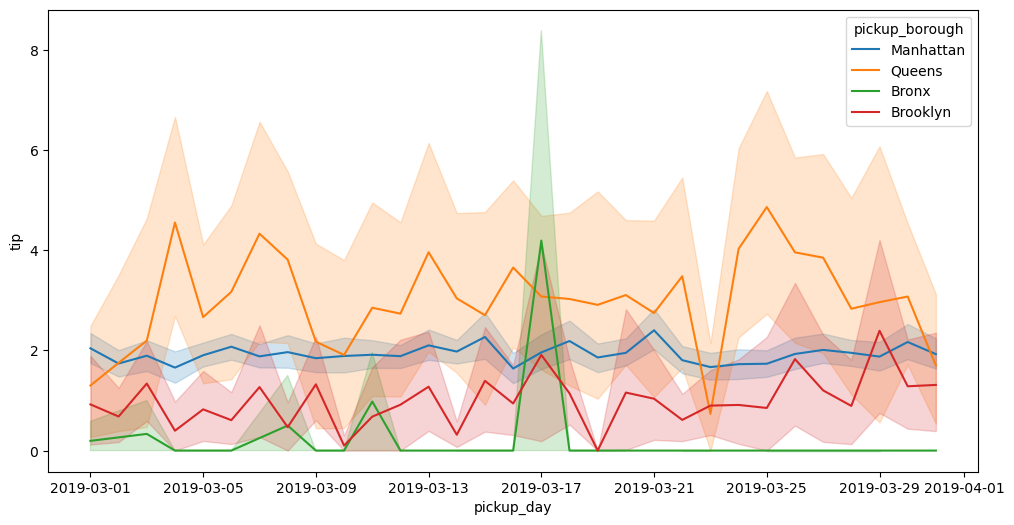

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data = df_taxi_new_clean, 
             x="pickup_day", 
             y="tip", 
             hue = 'pickup_borough');

Відповіді на питання:
- при початку поїздки в районі `Bronx` **найрідше** дають чайові.
- в поїздках з району `Manhattan` **найчастіше** дають чайові. 
- при проїздках з району `Manhattan` розмір чайових найстабільніший (найменше змінюється з дня у день).

14. Як відомо, наш набір даних містить інформацію про поїздки таксі у Нью Йорку за певний період 2019 році. Але є певна різниця між таксі у "The Big Apple":

Різниця між такі (source: [сайт](https://iporada.com/vse-pro-transport-v-ny/)).  
 

- **Yellow Cab (таксі)**
Якщо ви перебуваєте в середньому або нижньому Манхеттені, на вулицях ви побачите нереальну кількість жовтих таксі. Якщо вам потрібно таксі і на жовтому таксі горить світло, зупиняйте його. Якщо світло над ним не горить, значить воно зайняте.

На дверях таксі і в середині написано, скількі вони беруть за посадку і за кожну милю. Але щоб вам було спокійніше, у них є лічильник в середині, який показує, скільки ви вже наїздили. Можна платити готівкою або кредитною чи дебітною карткою. До речі, ці таксі викликати по телефону не можна – тільки хапати на дорозі.

- **Зелене таксі**
Якщо ви знаходитеся в верхньому Манхеттені або іншому районі Нью-Йорка (Брукліні, Бронксі, Квінсі або Стейтен Айленді) ви можете зупиняти тільки зелені таксі, бо жовті, по-перше, не зупиняються, а по-друге, **`їм не дозволено підбирати людей в тих районах, тільки відвозити в ті райони`**. Оплата працює так само.

15.1. Дізнаємось скільки в нас було авто жовтого та зеленого кольору в районах Нью-Йорка за березень 2019 року.

In [39]:
df_taxi_new_clean.groupby(['color', 'pickup_borough']).size()

color   pickup_borough
green   Bronx               83
        Brooklyn           313
        Manhattan          294
        Queens             287
yellow  Bronx               16
        Brooklyn            70
        Manhattan         4974
        Queens             369
dtype: int64

**БІЗНЕС-ЗАДАЧА: ЗРОЗУМІТИ ПОТОЧНУ НЕРІВНОМІРНІСТЬ РОЗПОДІЛУ ЧАЙОВИХ СЕРЕД ТАКСИСТІВ МІСТА НЬЮ-ЙОРК Й ПОКРАЩИТИ СИТУАЦІЮ З ЧАЙОВИМИ ДЛЯ ВОДІЇВ.**

**Три ключові питання:**
- **(15.2) Чи залежить розмір чайових таксисту від відстані поїздки (`distance`), базової плати за поїздку (`fare`) чи загальної вартості проїзду (`total`)?**
- **(15.3) Чи спостерігаються відмінності перелічених гіпотетичних взаємозв'язків в залежності від району початку поїзди (`pickup_borough`) або кольору авто (`color`)?**
- **(15.4) Коли та в якому районі Нью-Йорка (`pickup_borough`) спостерігається: 1) найбільша/найменша к-ть поїздок; 2) найбільша/найменша к-ть пасажирів; 3) найбільша/найменша середня відстань поїзди; 4) найбільша/найменша середня сума чайових?**

**15.2.** Чи залежить розмір чайових таксисту від відстані поїздки (`distance`) або базової плати за поїздку (`fare`)?

- **Гіпотеза 1:** розмір чайових (`tip`) залежить від відстані, яку проїде автомобіль, адже розмір чайових має бути прамопропорційний подоланій відстані (`distance`). 
- **Гіпотеза 2:** розмір чайових (`tip`) залежить від базовою плати за поїздку (`fare`).
- **Гіпотеза 3:** розмір чайових (`tip`) залежить від базовою плати за поїздку (`total`), адже загальноприйнято, що розмір чайових - це 5-15% від загальної вартості поїздки.

Знаходимо коефіцієнт кореляції Пірсона (`r`) між розміром чайових (`tip`) та відстанню поїздки (`distance`)/базовою платою за поїздку (`fare`)/загальною вартістю поїздки (`total`):

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
from scipy.stats import pearsonr

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

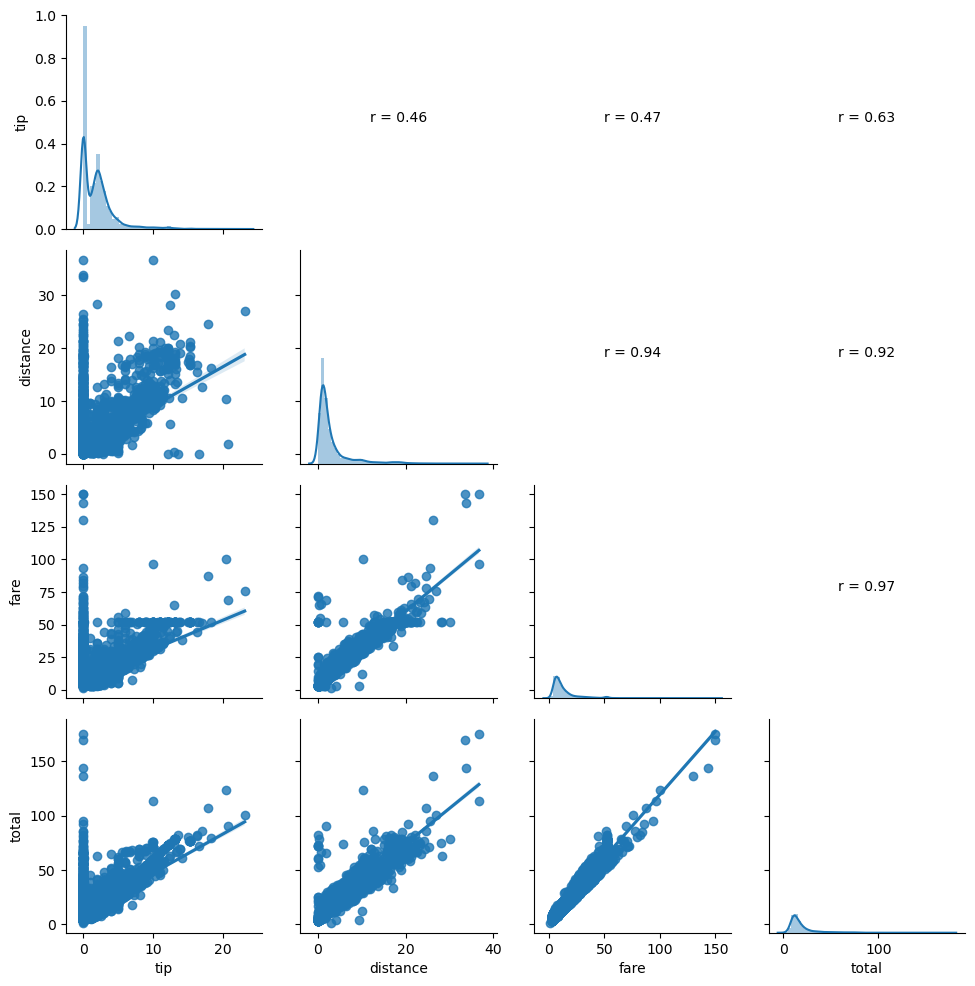

In [42]:
g = sns.PairGrid(df_taxi_new_clean[['tip','distance', 'fare', 'total']].fillna(0))

g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef);

**Відповідь до 15.2:** Згідно коефіцієнтів кореляції Пірсона (`r`) на рисунках вище, існує **ледь помітна позитивна кореляція** між розміром чайових (`tip`) та відстанню поїздки (`distance`), а також між розміром чайових (`tip`) та базовою платою за поїздку (`fare`) - **`r=0.46`** та **`r=0.47`** відповідно. Тому ми не можемо стверджувати, що розмір чайових залежить від дальності поїзди або від базової плати за поїздку.
З іншого боку, більший розмір чайових (`tip`) **суттєво залежить** від більшої загальної вартості проїзду (`total`), адже коефіцієнт кореляції між цими двома змінними `r>0.6` (зокрема, **`r=0.63`**).

**15.3.** Чи спостерігаються відмінності цього гіпотетичного взаємозв'язку в залежності від району початку поїзди (`pickup_borough`) або кольору авто (`color`)?

**`(15.3.1)`** Побудуємо **`heatmap`** взаємозалежності `'tip'` від `'distance', 'fare', 'total'` за ознакою `'pickup_borough'` (район початку поїздки таксі): 

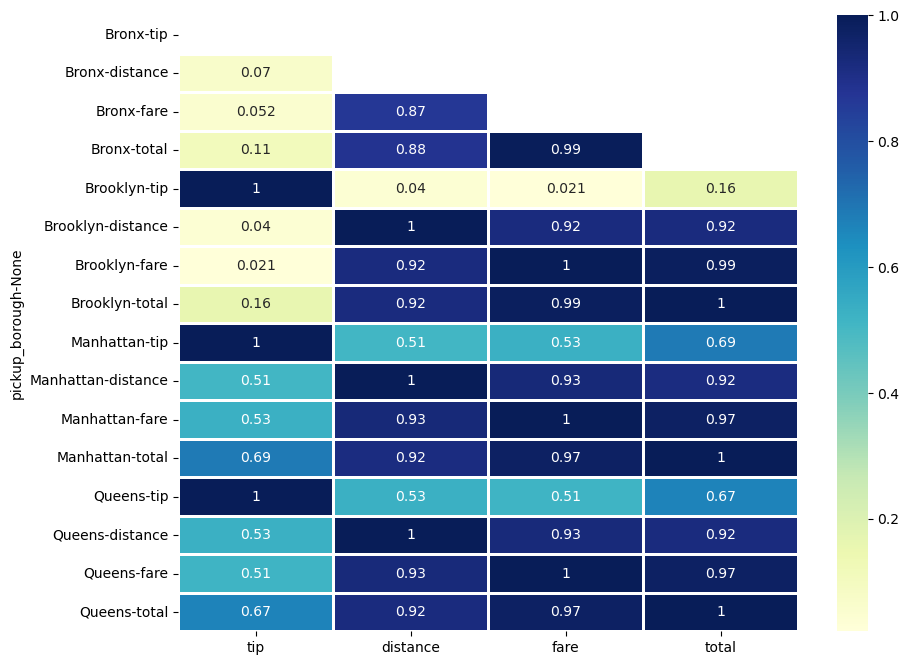

In [43]:
plt.figure(figsize=(10, 8))
matrix = np.triu(df_taxi_new_clean[['tip','distance', 'fare', 'total', 'pickup_borough']].groupby('pickup_borough').corr())
sns.heatmap(df_taxi_new_clean[['tip','distance', 'fare', 'total', 'pickup_borough']].groupby('pickup_borough').corr(), annot=True, linewidth=.8, mask=matrix, cmap="YlGnBu");

**Відповідь до 15.3.1:** На рисунку показано, що **позитивна кореляція** між між розміром чайових (`tip`) та відстанню поїздки (`distance`), базовою платою за поїздку (`fare`), загальною вартостю проїзди (`total`) спостерігається лише **у двох з чотирьох районів** Нью-Йорку (`pickup_borough`) - **`Manhattan`** та **`Queens`** (всі **`r>0.5`** - див. перший вертикальний стовпчик).

**`(15.3.2)`** Побудуємо **`heatmap`** взаємозалежності `'tip'` від `'distance', 'fare', 'total'` за ознакою `'color'` (колір таксі): 

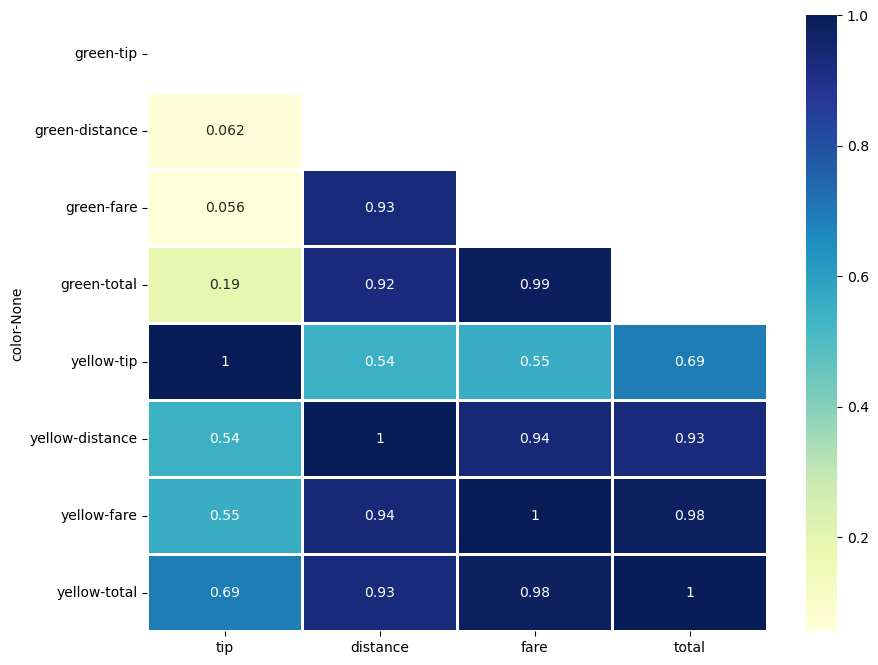

In [44]:
plt.figure(figsize=(10, 8))
matrix = np.triu(df_taxi_new_clean[['tip','distance', 'fare', 'total', 'color']].groupby('color').corr())
sns.heatmap(df_taxi_new_clean[['tip','distance', 'fare', 'total', 'color']].groupby('color').corr(), annot=True, linewidth=.8, mask=matrix, cmap="YlGnBu");

**Відповідь до 15.3.2:** На рисунку показано, що **позитивна кореляція** між розміром чайових (`tip`) та відстанню поїздки (`distance`), базовою платою за поїздку (`fare`), загальною вартостю проїзди (`total`) спостерігається лише у жовтих автівок (**`yellow`**) - всі **`r>0.5`** (див. перший вертикальний стовпчик). Зелені таксі (**`green`**) мають **нейтральну кореляцію** між розміром чайових (`tip`) та відстанню поїздки (`distance`), базовою платою за поїздку (`fare`), загальною вартостю проїзди (`total`).

**ВИСНОВОК:** 

У м. Нью-Йорк спостерігається **неоднозначна ситуація** з чайовими для таксистів. З одного боку, в межах міста розмір чайових **найбільше залежить** від загальної вартості поїздки ('total'), а **найменше** - від відстані поїздки ('distance') та базової плати за поїздку ('fare'). З іншого боку, у розрізі міських районів існує суттєва диспропорція розміру чайових. Так, таксисти, що забирають пасажирів у таких районах як **`Bronx`** або **`Brooklyn`** мають **значно менше шансів** отримати чайові в залежності від базових чинників ('distance', 'fare', 'total'), аніж у тих таксистів, що забирають пасажирів з **`Manhattan`** або **`Queens`**.

Окрім того, існує **суттєва нерівномірність** у розмірах чайових серед таксистів-власників зелених (**`green`**) та жовтих (**`yellow`**) авто. Зокрема, у таксистів з жовтим авто(**`yellow`**) є **значно більше шансів** отримати чайові в залежності від базових чинників ('distance', 'fare', 'total'), аніж у тих таксистів, що мають зелене авто (**`green`**). 

**15.4.** Коли та в якому районі Нью-Йорка (`pickup_borough`) спостерігається: 
- *1) найбільша/найменша к-ть поїздок?* 
- *2) найбільша/найменша к-ть пасажирів?* 
- *3) найбільша/найменша середня відстань поїзди?* 
- *4) найбільша/найменша середня сума чайових?*

Щоб відповісти на перелічені запитання потрібно створити нову змінну (`pickup_hour`):

In [48]:
df_taxi_new_clean['pickup_hour'] = df_taxi_new_clean['pickup'].dt.hour

Перевіримо чи створилась нова змінна `pickup_hour`. Виводимо перші п'ять рядків датафрейму `df_taxi_new_clean` та порахуємо к-ть поїздок погодинно:

In [49]:
df_taxi_new_clean.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day,pickup_hour
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23,20
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04,16
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27,17
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30,13


In [50]:
df_taxi_new_clean['pickup_hour'].value_counts()

18    417
19    404
17    388
20    366
14    358
21    355
16    335
12    332
15    327
10    325
22    320
9     318
13    315
8     312
11    295
23    292
7     221
0     203
6     139
1     109
2     101
3      67
4      57
5      50
Name: pickup_hour, dtype: int64

Спробуємо відповісти на комплексне запитання **15.3** теж комплексно. Для цього побудуємо тематичні зведені таблиці й побудуємо на їхній базі комплексний рисунок. За допомогою комплексного рисунку відповімо на питання про те де і о котрій годині спостерігається:
- *1) найбільша/найменша к-ть поїздок?* 
- *2) найбільша/найменша к-ть пасажирів?* 
- *3) найбільша/найменша середня відстань поїзди?* 
- *4) найбільша/найменша середня сума чайових?*

In [51]:
borough_pivot_rides = df_taxi_new_clean.pivot_table(index='pickup_hour', 
                                                 columns='pickup_borough', 
                                                 values='total',  
                                                 aggfunc='size')
display(borough_pivot_rides.style.background_gradient(axis=1));

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_hour,,,,
0,nan,18.000000,158.000000,27.000000
1,1.000000,5.000000,86.000000,17.000000
2,nan,11.000000,75.000000,15.000000
3,1.000000,5.000000,54.000000,7.000000
4,nan,1.000000,51.000000,5.000000
5,nan,1.000000,41.000000,8.000000
6,4.000000,12.000000,109.000000,14.000000
7,6.000000,10.000000,188.000000,17.000000
8,9.000000,11.000000,269.000000,23.000000


In [52]:
borough_pivot_passengers = df_taxi_new_clean.pivot_table(index='pickup_hour', 
                                             columns='pickup_borough', 
                                             values='passengers',  
                                             aggfunc='sum')
display(borough_pivot_passengers.style.background_gradient(axis=1));

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_hour,,,,
0,nan,23.000000,258.000000,42.000000
1,1.000000,10.000000,149.000000,33.000000
2,nan,17.000000,119.000000,17.000000
3,1.000000,5.000000,90.000000,9.000000
4,nan,5.000000,84.000000,6.000000
5,nan,1.000000,60.000000,13.000000
6,4.000000,14.000000,160.000000,21.000000
7,5.000000,12.000000,283.000000,22.000000
8,13.000000,15.000000,395.000000,41.000000


In [53]:
borough_pivot_distance = df_taxi_new_clean.pivot_table(index='pickup_hour', 
                                             columns='pickup_borough', 
                                             values='distance',  
                                             aggfunc='mean')
display(borough_pivot_distance.style.background_gradient(axis=1));

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_hour,,,,
0,nan,4.834444,2.951519,7.005556
1,2.360000,2.376000,2.950581,4.872941
2,nan,2.909091,2.962267,4.851333
3,0.070000,6.964000,3.238333,3.011429
4,nan,0.940000,4.236078,7.022000
5,nan,13.660000,4.233171,9.327500
6,5.852500,7.034167,2.384862,7.342857
7,12.253333,2.909000,2.337660,11.245882
8,4.298889,4.585455,2.293160,5.063913


In [54]:
borough_pivot_tip = df_taxi_new_clean.pivot_table(index='pickup_hour', 
                                             columns='pickup_borough', 
                                             values='tip',  
                                             aggfunc='mean')
display(borough_pivot_tip.style.background_gradient(axis=1));

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_hour,,,,
0,nan,1.576667,2.001266,3.638889
1,0.000000,1.542000,2.095000,1.962353
2,nan,1.275455,2.037467,0.265333
3,0.000000,0.000000,1.969074,0.265714
4,nan,0.000000,2.373333,3.094000
5,nan,0.000000,2.559024,5.441250
6,0.000000,0.088333,1.801193,1.355714
7,0.000000,0.566000,1.743564,4.225882
8,0.000000,0.982727,1.813866,2.484783


<Figure size 2250x1500 with 0 Axes>

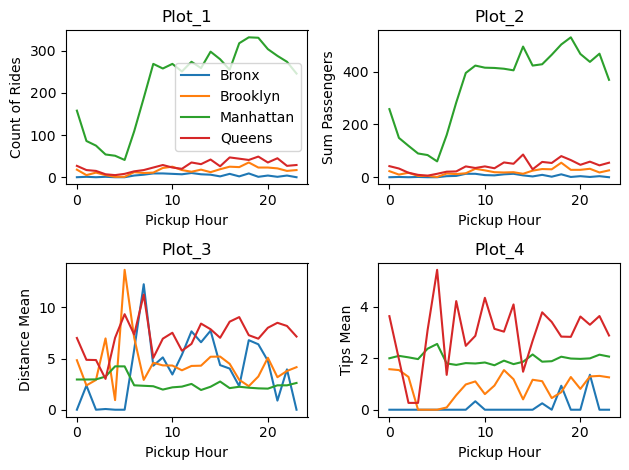

In [55]:
plt.figure(figsize=(15,10), dpi=150)
# Спочатку створимо сітку графіків
# ax буде масивом із чотирьох об'єктів Axes
fig, ax = plt.subplots(2,2)

# Виклик plot() методу для потрібного об'єкта
ax[0,0].plot(borough_pivot_rides.fillna(0))
ax[0,0].set(xlabel='Pickup Hour', ylabel='Count of Rides', 
    title='Plot_1')
ax[0,0].legend(borough_pivot_rides);

ax[0,1].plot(borough_pivot_passengers.fillna(0))
ax[0,1].set(xlabel='Pickup Hour', ylabel='Sum Passengers',
            title='Plot_2')
#ax[0,1].legend(borough_pivot_passengers);

ax[1,0].plot(borough_pivot_distance.fillna(0))
ax[1,0].set(xlabel='Pickup Hour', ylabel='Distance Mean',
            title='Plot_3')
#ax[1,0].legend(borough_pivot_distance);

ax[1,1].plot(borough_pivot_tip.fillna(0))
ax[1,1].set(xlabel='Pickup Hour', ylabel='Tips Mean', 
            title='Plot_4')
#ax[1,1].legend(borough_pivot_tip);

plt.tight_layout();

**Відповідь до 15.4:** 
- Як видно з **Plot_1** найбільша к-ть початку поїздок спостерігається у районі **Manhattan**, а найменша кількість поїздок у **Bronx**. Найбільше викликів таксі спостерігається у денні години, особливо 16:00-18:00.
- Як видно з **Plot_2** найбільший пасажиропотік фіксується у районі **Manhattan**, а найменший - у **Bronx**. Найбільше пасажирів спостерігається у денні години, особливо 17:00-19:00.
- Як видно з **Plot_3** середня дистанція поїздки у різних районах міста є дуже строкатою та залежить від часу доби. Загалом, найбільшу відстань, яку проїжджають таксисти спостерігається у ранні ранкові години, з 12:00 до 15:00 та різким стрибком у з 18:00 до 20:00.
- Як видно з **Plot_4** найбільший середній розмір чайових найчастіше фіксується у таксистів, що почали свою поїздку з району **Queens**, а слідом за ним йде район **Manhattan**, що вирізняється більш-менш стабільним розміром чайових протягом усієї доби (близько 2 USD).


`Для перевірки отриманих результатів побудуємо окремо кожен з чотирьох графіків на вищезазначеному комплесному рисунку:`

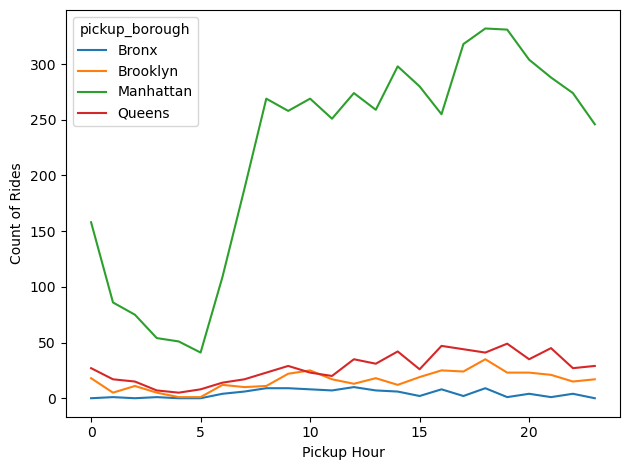

In [56]:
borough_pivot_rides.fillna(0).plot()
plt.xlabel('Pickup Hour')
plt.ylabel('Count of Rides')
plt.tight_layout();

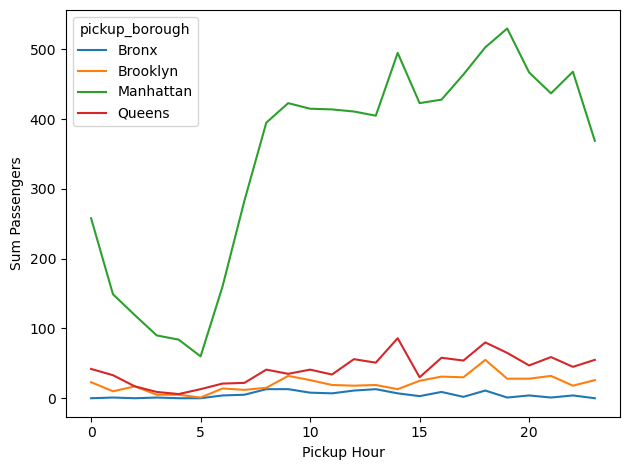

In [57]:
borough_pivot_passengers.fillna(0).plot()
plt.xlabel('Pickup Hour')
plt.ylabel('Sum Passengers')
plt.tight_layout();

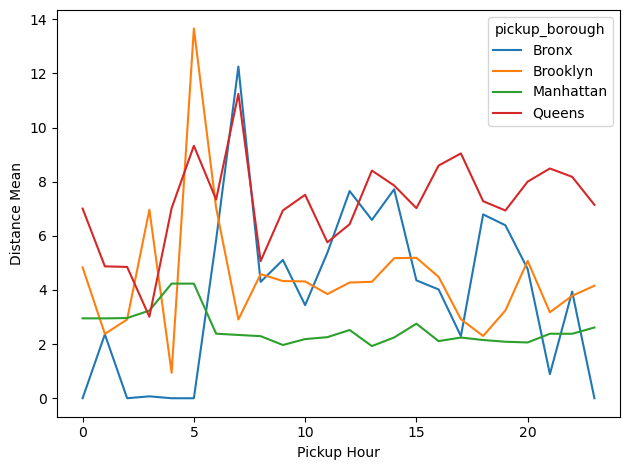

In [58]:
borough_pivot_distance.fillna(0).plot()
plt.xlabel('Pickup Hour')
plt.ylabel('Distance Mean')
plt.tight_layout();

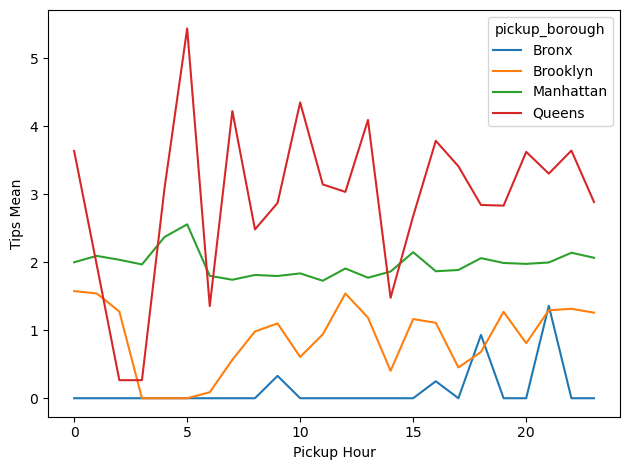

In [59]:
borough_pivot_tip.fillna(0).plot()
plt.xlabel('Pickup Hour')
plt.ylabel('Tips Mean')
plt.tight_layout();

**Перевірка пройдена успішно!**

                                                        ВИСНОВОК


**ОПИС ПОТОЧНОЇ СИТУАЦІЇ:** 


У м. Нью-Йорк спостерігається **неоднозначна ситуація** з чайовими для таксистів. З одного боку, в межах міста розмір чайових **найбільше залежить** від загальної вартості поїздки ('total'), а **найменше** - від відстані поїздки ('distance') та базової плати за поїздку ('fare'). З іншого боку, у розрізі міських районів існує суттєва диспропорція розміру чайових. Так, таксисти, що забирають пасажирів у таких районах як **`Bronx`** або **`Brooklyn`** мають **значно менше шансів** отримати чайові в залежності від базових чинників ('distance', 'fare', 'total'), аніж у тих таксистів, що забирають пасажирів з **`Manhattan`** або **`Queens`**.

Окрім того, існує **суттєва нерівномірність** у розмірах чайових серед таксистів-власників зелених (**`green`**) та жовтих (**`yellow`**) авто. Зокрема, у таксистів з жовтим авто(**`yellow`**) є **значно більше шансів** отримати чайові в залежності від базових чинників ('distance', 'fare', 'total'), аніж у тих таксистів, що мають зелене авто (**`green`**).

- Найбільша к-ть початку поїздок спостерігається у районі **Manhattan**, а найменша кількість поїздок у **Bronx**. Найбільше викликів таксі спостерігається у денні години, особливо 16:00-18:00.
- Найбільший пасажиропотік фіксується у районі **Manhattan**, а найменший - у **Bronx**. Найбільше пасажирів спостерігається у денні години, особливо 17:00-19:00.
- Середня дистанція поїздки у різних районах міста є **дуже строкатою** та залежить від часу доби. Загалом, найбільшу відстань, яку проїжджають таксисти спостерігається у ранні ранкові години, з 12:00 до 15:00 та різким стрибком у з 18:00 до 20:00.
- Найбільший середній розмір чайових найчастіше фіксується у таксистів, що почали свою поїздку з району **Queens**, а слідом за ним йде район **Manhattan**, що вирізняється більш-менш стабільним розміром чайових протягом усієї доби (близько 2 USD).

**БІЗНЕС-РІШЕННЯ:**
Вирішення проблеми:
    - Тасисити повинні щодватижні змінювати колір автотранспорту (здійснювати заміну авто в межах наявного таксопарку), адже це напряму впливає на розмір чайових (підтверджується вищеописаними результатами). Окрім того, існує й певна погодинна нерівномірність отримання чайових протягом доби в залежності від кольору авто (див. бонусний `boxplot` знизу);
    - таксисти мають щодватижні змінювати район посадки пасажирів із районів-аутсайдерів (**`Bronx`**&**`Brooklyn`**) на районів-лідерів (**`Queens`**&**`Manhattan`**).
    Описані заходи мають допомогти отримувати більш гармонізовані чайові щомісяця. Якщо ж така щомісячна зміна авто та району буде незручною для компанії, то можна спробувати проводити ці заходи щоквартально. 

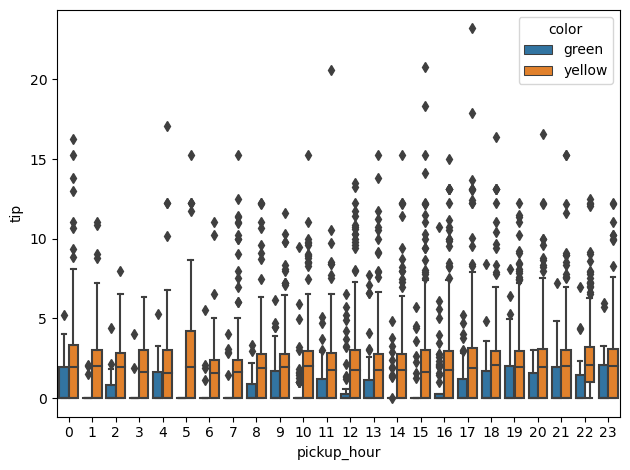

In [60]:
sns.boxplot(data=df_taxi_new_clean, 
            x="pickup_hour", 
            y="tip", 
            hue="color", hue_order=('green', 'yellow'))
plt.tight_layout();